**DS 301: Applied Data Modeling and Predictive Analysis**

# Lab 5 – Polynomial Regression

Nok Wongpiromsarn, 8 August 2022

**Credit:** https://github.com/asukul/DS301-f19/blob/master/Lab3_Polynomial-Regression_HousePrice-v2.ipynb by Adisak Sukul

- A portion of the code & theory has been taken from the book - Hands-on machine learning with Scikit-Learn and TensorFlow: concepts, tools, and techniques to build intelligent systems by A. Geron
- A portion of visualization has been taken from Kaggle kernels - COMPREHENSIVE DATA EXPLORATION WITH PYTHON
Pedro Marcelino - February 2017 https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

**Instructions:**
Please go over the sample code shown below and use it as a reference for your lab assignment. Perform linear and polynomial regression with 'SalePrice' as the output using the following selected features:
1. 'Year Built'
   1. Set up the training and test sets with 'YearBuilt' as input and 'SalePrice' as output.
   2. Perform linear regression and evaluate your linear regression model with MSE and RMSE.
   3. Perform polynomial regression and evaluate your polynomial regression model with MSE and RMSE. Determine the polynomial degree and explain your choice. (Hint: Use the MSE and RMSE to pick the polynomial degree.)
   4. Retrain your polynomial model by applying one of the regularization techniques. Keep the same polynomial degree. Try with at least 3 values of alpha. Don't forget to scale the data! Evaluate your new model.
   5. Plot the results of the 5 models.
2. 'Year Built' and 'Overall Quality'
   1. Set up the training and test sets with 'YearBuilt' and 'OverallQual' as input and 'SalePrice' as output.
   2. Perform linear regression and evaluate your linear regression model with MSE and RMSE.
   3. Perform polynomial regression with degree=3 and evaluate your polynomial regression model with MSE and RMSE.
   4. Retrain your polynomial model by applying one of the regularization techniques. Keep the same polynomial degree. Try with at least 3 values of alpha. Don't forget to scale the data! Evaluate your new model.
   5. Plot the results of all the 5 models.
3. Describe and compare the results with different models.
4. Explain the computation time for different models and features

**Visualize the data**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("datasets/house-price.csv")

C:\Users\justi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

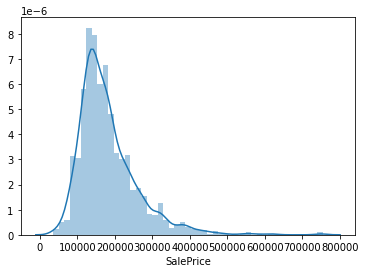

In [6]:
#histogram
sns.distplot(df['SalePrice']);

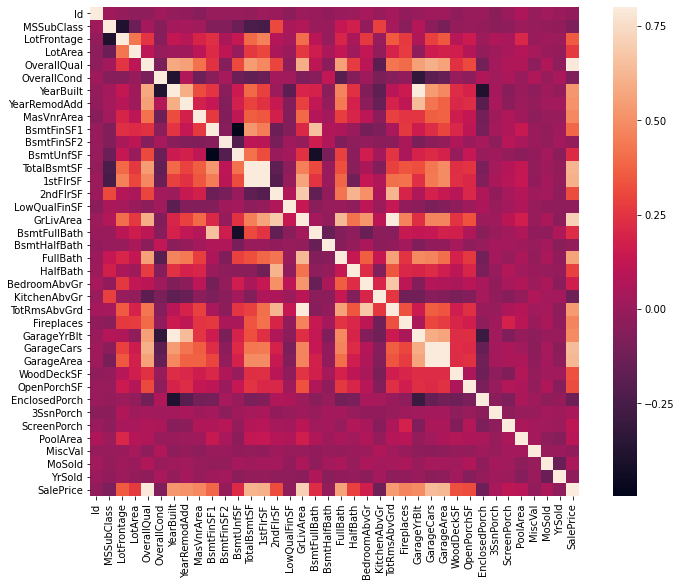

In [7]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

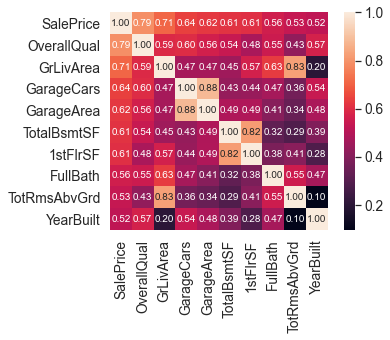

In [8]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

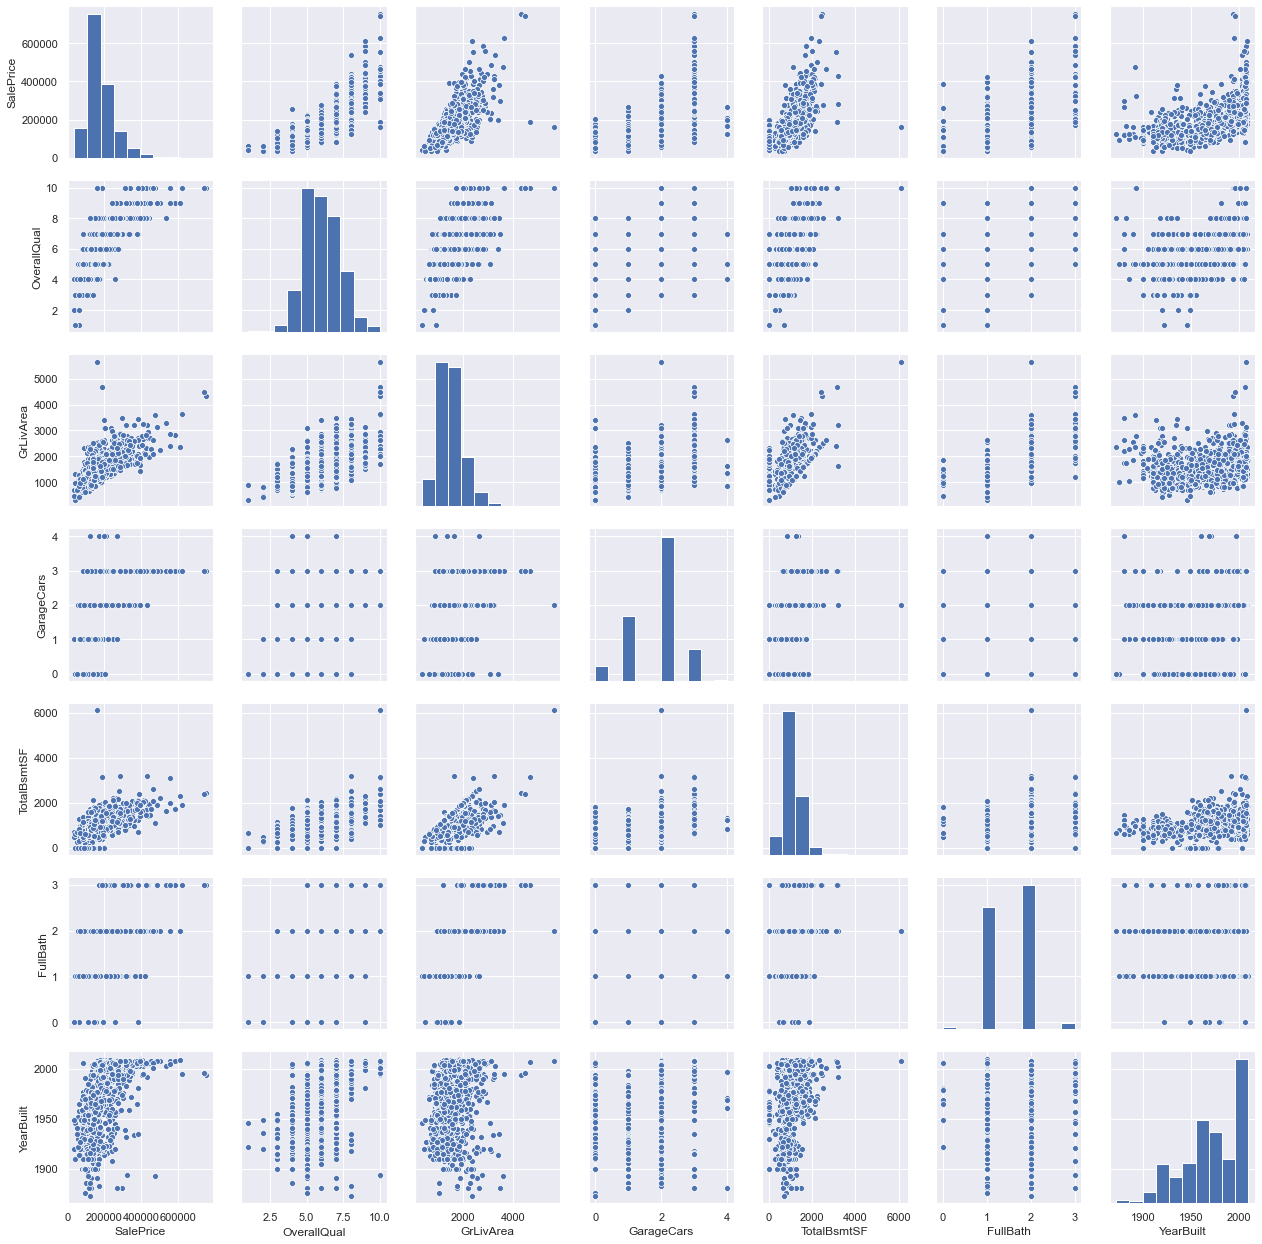

In [9]:
#selected fewer feature for pairplot (scatterplot matrix)
#let's select fewer features that having hige correlation with our target SalePrice
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols], height = 2.5)
plt.show();

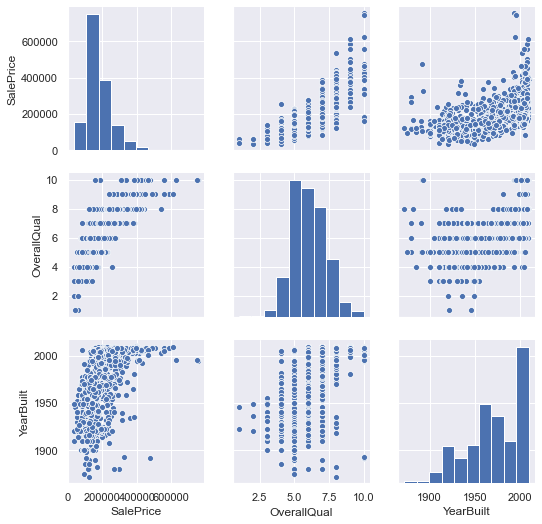

In [10]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'YearBuilt']
sns.pairplot(df[cols], height = 2.5)
plt.show();

### 1. Start with YearBuilt as input and SalePrice as output

**1.1 Set up the training and test sets**

In [11]:
from sklearn.model_selection import train_test_split

X = df[['YearBuilt']]
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)

      YearBuilt
254        1957
1066       1993
638        1910
799        1937
380        1924
...         ...
1095       2006
1130       1928
1294       1955
860        1918
1126       2007

[1168 rows x 1 columns]


**1.2 Linear regression**

Train the model

In [12]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

C:\Users\justi\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


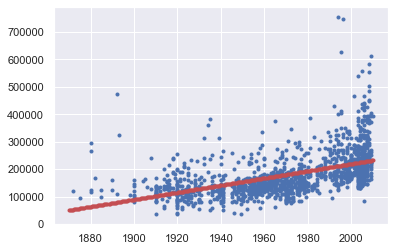

In [13]:
# Plot the result
X_plot = np.linspace(1870, 2010, 292).reshape(292, 1)
y_plot_linear = lin_reg.predict(X_plot)

plt.plot(X, y, "b.")
plt.plot(X_plot, y_plot_linear, "r.")
plt.show()

Evaluate the model

In [14]:
y_pred_linear = lin_reg.predict(X_test)

In [15]:
# MSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred_linear)
print("MSE linear model: {}".format(mse))

# RMSE
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred_linear))
print("RMSE linear model: {}".format(rmse))

MSE linear model: 5447834477.467489
RMSE linear model: 73809.44707466307


**1.3 Polynomial regression**

Please play with this polynomial degree, take a look at the performance, and pick the degree that performs best.

In [42]:
from sklearn.preprocessing import PolynomialFeatures

# Add the square of each feature in the training set as a new feature
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
# I chose 3 degrees for the polynomial degree since the MSE and RMSE are the smallest.

# X_train_poly now contains the original feature of X_train plus the square of this feature
print(X_train_poly)

# Now fit a LinearRegression model to this extended training data
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

[[1.95700000e+03 3.82984900e+06 7.49501449e+09]
 [1.99300000e+03 3.97204900e+06 7.91629366e+09]
 [1.91000000e+03 3.64810000e+06 6.96787100e+09]
 ...
 [1.95500000e+03 3.82202500e+06 7.47205888e+09]
 [1.91800000e+03 3.67872400e+06 7.05579263e+09]
 [2.00700000e+03 4.02804900e+06 8.08429434e+09]]


LinearRegression()

C:\Users\justi\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


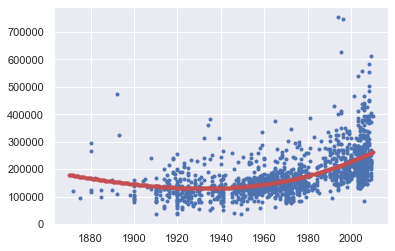

In [43]:
# Plot the result
X_plot_poly = poly_features.transform(X_plot)
y_plot_poly = poly_reg.predict(X_plot_poly)

plt.plot(X, y, "b.")
plt.plot(X_plot, y_plot_poly, "r.")
plt.show()

Evaluate the model

In [44]:
X_test_poly = poly_features.transform(X_test)
y_pred_poly = poly_reg.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred_poly)
rmse = sqrt(mean_squared_error(y_test, y_pred_poly))
print("MSE polynomial model: {}".format(mse))
print("RMSE polynomial model: {}".format(rmse))

MSE polynomial model: 4918390338.577166
RMSE polynomial model: 70131.23653962737


**1.4 Regularized polynomial regression**

Feel free to pick your favourite regularization techniques. (The template is using Ridge Regression.) Try with at least 3 different values of alpha.

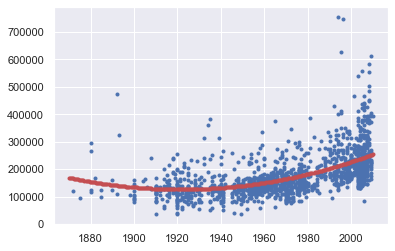

MSE ridge (alpha=0.05) : 4991902014.482626
RMSE ridge (alpha=0.05): 70653.39351002629


In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

# Keep X_train_poly from 1.3 and apply scaling. This is very important when performing regularization.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)

# Train Ridge Regression model
alpha1 = 0.05
ridge_reg1 = Ridge(alpha=alpha1, solver="cholesky")
ridge_reg1.fit(X_train_scaled, y_train)

# Plot the result
X_plot_scaled = scaler.transform(X_plot_poly)
y_plot_ridge1 = ridge_reg1.predict(X_plot_scaled)

plt.plot(X, y, "b.")
plt.plot(X_plot, y_plot_ridge1, "r.")
plt.show()

# Evaluate the model
X_test_scaled = scaler.transform(X_test_poly)
y_pred_ridge1 = ridge_reg1.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred_ridge1)
rmse = sqrt(mean_squared_error(y_test, y_pred_ridge1))
print("MSE ridge (alpha={}) : {}".format(alpha1, mse))
print("RMSE ridge (alpha={}): {}".format(alpha1, rmse))

Construct 2 more regularized models with different values of alpha (One with alpha = 0.25 and one with alpha = 0.5).

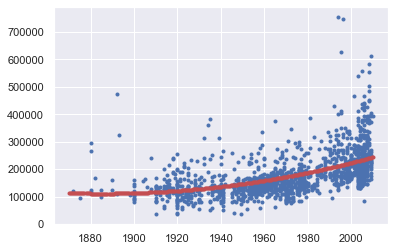

MSE ridge (alpha=0.25) : 4991902014.482626
RMSE ridge (alpha=0.25): 70653.39351002629


In [60]:
# Keep X_train_poly from 1.3 and apply scaling. This is very important when performing regularization.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)

# Train Ridge Regression model
alpha2 = 0.25
ridge_reg2 = Ridge(alpha=alpha2, solver="cholesky")
ridge_reg2.fit(X_train_scaled, y_train)

# Plot the result
X_plot_scaled = scaler.transform(X_plot_poly)
y_plot_ridge2 = ridge_reg2.predict(X_plot_scaled)

plt.plot(X, y, "b.")
plt.plot(X_plot, y_plot_ridge2, "r.")
plt.show()

# Evaluate the model
X_test_scaled = scaler.transform(X_test_poly)
y_pred_ridge2 = ridge_reg1.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred_ridge2)
rmse = sqrt(mean_squared_error(y_test, y_pred_ridge2))
print("MSE ridge (alpha={}) : {}".format(alpha2, mse))
print("RMSE ridge (alpha={}): {}".format(alpha2, rmse))

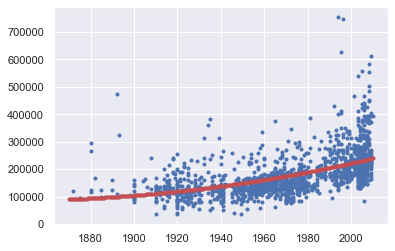

MSE ridge (alpha=0.5) : 5244698348.305984
RMSE ridge (alpha=0.5): 72420.28961766159


In [61]:
# Keep X_train_poly from 1.3 and apply scaling. This is very important when performing regularization.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)

# Train Ridge Regression model
alpha3 = 0.5
ridge_reg3 = Ridge(alpha=alpha3, solver="cholesky")
ridge_reg3.fit(X_train_scaled, y_train)

# Plot the result
X_plot_scaled = scaler.transform(X_plot_poly)
y_plot_ridge3 = ridge_reg3.predict(X_plot_scaled)

plt.plot(X, y, "b.")
plt.plot(X_plot, y_plot_ridge3, "r.")
plt.show()

# Evaluate the model
X_test_scaled = scaler.transform(X_test_poly)
y_pred_ridge3 = ridge_reg3.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred_ridge3)
rmse = sqrt(mean_squared_error(y_test, y_pred_ridge3))
print("MSE ridge (alpha={}) : {}".format(alpha3, mse))
print("RMSE ridge (alpha={}): {}".format(alpha3, rmse))

**1.5 Plot the results of the 5 models**

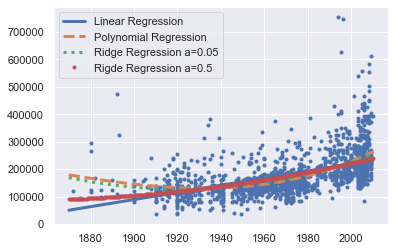

In [62]:
plt.plot(X, y, "b.")
plt.plot(X_plot, y_plot_linear, '-', linewidth=3, label="Linear Regression")
plt.plot(X_plot, y_plot_poly, '--', linewidth=3, label="Polynomial Regression")
plt.plot(X_plot, y_plot_ridge1, ':', linewidth=3, label="Ridge Regression a="+str(alpha1))
plt.plot(X_plot, y_plot_ridge3, "r.", linewidth=3, label="Ridge Regression a="+str(alpha3))

# TODO: Add the plot from regularized polynomial regression

plt.legend()
plt.show()

### 2. Use both YearBuilt and OverallQual as input and SalePrice as output

**2.1 Set up the training and test sets with 'YearBuilt' and 'OverallQual' as input and 'SalePrice' as output.**

In [63]:
X = df[['YearBuilt', 'OverallQual']]
y = df['SalePrice']

# TODO: Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)


      YearBuilt  OverallQual
254        1957            5
1066       1993            6
638        1910            5
799        1937            5
380        1924            5
...         ...          ...
1095       2006            6
1130       1928            4
1294       1955            5
860        1918            7
1126       2007            7

[1168 rows x 2 columns]


**2.2. Perform linear regression and evaluate your linear regression model with MSE and RMSE.**

In [64]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_linear = lin_reg.predict(X_test)

# MSE
mse = mean_squared_error(y_test, y_pred_linear)
print("MSE linear model: {}".format(mse))

# RMSE
rmse = sqrt(mean_squared_error(y_test, y_pred_linear))
print("RMSE linear model: {}".format(rmse))

MSE linear model: 2660945324.2469893
RMSE linear model: 51584.35154431031


**2.3 Perform polynomial regression with degree=3 and evaluate your polynomial regression model with MSE and RMSE.**

In [65]:
# Add the square of each feature in the training set as a new feature
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)

# X_train_poly now contains the original feature of X_train plus the square of this feature
print(X_train_poly)

# Now fit a LinearRegression model to this extended training data
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

X_test_poly = poly_features.transform(X_test)
y_pred_poly = poly_reg.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred_poly)
rmse = sqrt(mean_squared_error(y_test, y_pred_poly))
print("MSE polynomial model: {}".format(mse))
print("RMSE polynomial model: {}".format(rmse))

[[1.9570000e+03 5.0000000e+00 3.8298490e+06 ... 1.9149245e+07
  4.8925000e+04 1.2500000e+02]
 [1.9930000e+03 6.0000000e+00 3.9720490e+06 ... 2.3832294e+07
  7.1748000e+04 2.1600000e+02]
 [1.9100000e+03 5.0000000e+00 3.6481000e+06 ... 1.8240500e+07
  4.7750000e+04 1.2500000e+02]
 ...
 [1.9550000e+03 5.0000000e+00 3.8220250e+06 ... 1.9110125e+07
  4.8875000e+04 1.2500000e+02]
 [1.9180000e+03 7.0000000e+00 3.6787240e+06 ... 2.5751068e+07
  9.3982000e+04 3.4300000e+02]
 [2.0070000e+03 7.0000000e+00 4.0280490e+06 ... 2.8196343e+07
  9.8343000e+04 3.4300000e+02]]
MSE polynomial model: 2032542671.6433933
RMSE polynomial model: 45083.7295667006


**2.4 Retrain your polynomial model by applying one of the regularization techniques. Keep the same polynomial degree. Don't forget to scale the data! Evaluate your new model.**

In [68]:
# Keep X_train_poly from 1.3 and apply scaling. This is very important when performing regularization.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)

# Train Ridge Regression model
alpha1 = 0.05
ridge_reg1 = Ridge(alpha=alpha1, solver="cholesky")
ridge_reg1.fit(X_train_scaled, y_train)

# Plot the result
X_plot_scaled = scaler.transform(X_plot_poly)
y_plot_ridge1 = ridge_reg1.predict(X_plot_scaled)

plt.plot(X, y, "b.")
plt.plot(X_plot, y_plot_ridge1, "r.")
plt.show()

# Evaluate the model
X_test_scaled = scaler.transform(X_test_poly)
y_pred_ridge1 = ridge_reg1.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred_ridge1)
rmse = sqrt(mean_squared_error(y_test, y_pred_ridge1))
print("MSE ridge (alpha={}) : {}".format(alpha1, mse))
print("RMSE ridge (alpha={}): {}".format(alpha1, rmse))

ValueError: X has 3 features, but StandardScaler is expecting 9 features as input.

**2.5 Plot the results of all the 3 models (linear regression, polynomial regression, regularized regression) in one plot.**

In [ ]:
# 2D plot with the x-axis being YearBuilt, keeping OverallQual fixed at its mean.
# Create X_plot with 2 columns. The first column is YearBuilt created as in 1.2.
# The other column is a constant array with the value being the mean of OverallQual
num_X_plot = 292
X_plot = np.linspace(1870, 2010, num_X_plot).reshape(num_X_plot, 1)
X_plot = np.append(X_plot, np.full((num_X_plot, 1), df['OverallQual'].mean()), axis=1)

# TODO: Compute the prediction for the linear, polynomial and regularized models.
# Don't forget to transform X_plot for polynomial and regularized models.


# Get the rows such that OverallQual is around the mean
rows = (df['OverallQual'] > df['OverallQual'].mean() - 0.1) & (df['OverallQual'] < df['OverallQual'].mean() + 0.1)

plt.plot(X.loc[rows, 'YearBuilt'], y.loc[rows], "b.")

# TODO: Plot the prediction from the 3 models

ValueError: x and y must have same first dimension, but have shapes (5840, 2) and (292,)

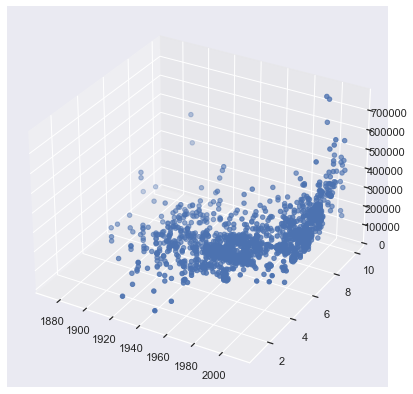

In [69]:
# 3D plot
# Create X_plot with 2 columns such that we have all the combinations of YearBuilt and OverallQual.
num_year_plot = 292
num_qual_plot = 20
year_plot = np.linspace(1870, 2010, num_year_plot).reshape(num_year_plot, 1)
qual_plot = np.linspace(1.0, 10.0, num_qual_plot).reshape(num_qual_plot, 1)
X_plot_year, X_plot_qual = np.meshgrid(year_plot, qual_plot)
X_plot_year = X_plot_year.reshape(-1, 1)
X_plot_qual = X_plot_qual.reshape(-1, 1)
X_plot = np.append(X_plot_year, X_plot_qual, axis=1)

# TODO: Compute the prediction for the linear, polynomial and regularized models.
# Don't forget to transform X_plot for polynomial and regularized models.


# 3d scatter plot
fig = plt.figure(figsize = (10, 7)) 
ax = plt.axes(projection ="3d") 
ax.scatter(X['YearBuilt'], X['OverallQual'], y, "b.")

# TODO: Plot the prediction.
# For example, once you have y_plot_linear from the linear model, you can do
# ax.plot_trisurf(X_plot_year.flatten(), X_plot_qual.flatten(), y_plot_linear, cmap='viridis', edgecolor='none')
plt.plot(X_plot, y_plot_linear, '-', linewidth=3, label="Linear Regression")
plt.plot(X_plot, y_plot_poly, '--', linewidth=3, label="Polynomial Regression")
plt.plot(X_plot, y_plot_ridge1, ':', linewidth=3, label="Ridge Regression a="+str(alpha1))
plt.show()

### 3. Describe and compare the results with different models

The regularized Ridge Regression had the lowest error overall and was the most accurate model for this dataset.